# Lecture 7

# Section 3: Structured Query Language (SQL) in Python

Hint: All the examples and explanations from this second part of today's lecture can be found in chapter 17 of the book.

## A `books` Database

* a simple database storing data about book titles and its authors

### Creating the `books` Database
* we already have the SQLite database named `books.db`
* if not (or you want to use the example in another SQL DB) you can create it from the `books.sql` file 
* In your Anaconda Command Prompt, Terminal or shell, change to the folder of this lecture. The following **sqlite3 command** creates a **SQLite database** named `books.db` and executes the `books.sql` SQL script, which defines how to create the database’s tables and populates them with data:

> `sqlite3 books.db < books.sql`

* The notation `<` indicates that `books.sql` is input into the sqlite3 command. When the command completes, the database is ready for use.

### Connecting to the Database in Python

In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect('books.db')

### `authors` Table

The database has three tables—`authors`, `author_ISBN` and `titles`. The authors table
stores all the authors and has three columns:
* `id`—The author’s unique ID number. This integer column is defined as **autoincremented**—for each row inserted in the table, SQLite increases the `id` value by 1 to ensure that each row has a unique value. This column is the table’s **primary key**.
* `first`—The author’s first name (a string).
* `last`—The author’s last name (a string).

### Viewing the `authors` Table’s Contents

In [3]:
# pandas is a data analysis and manipulation tool
# we will cover pandas at a later stage
import pandas as pd 

In [5]:
pd.options.display.max_columns = 10 # how many columns of results to display

In [10]:
pd.read_sql('SELECT * FROM authors', connection, index_col=['id'])

,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald


Pandas function `read_sql` executes a SQL query and returns a `DataFrame` containing the query’s results. The function’s arguments are:
* a string representing the **SQL query** to execute,
* the SQLite database’s **Connection object**, and in this case
* an `index_col` **keyword argument** indicating which column should be used as the DataFrame’s row indices (the author’s id values in this case).
* when index_col is not passed, index values starting from 0 appear to the left of the DataFrame’s rows.

### `titles` Table
The titles table stores all the books and has four columns:
* `isbn`—The book’s ISBN (a string) is this table’s primary key. ISBN is an abbreviation for “International Standard Book Number,” which is a numbering scheme that publishers use to give every book a unique identification number.
* `title`—The book’s title (a string).
* `edition`—The book’s edition number (an integer).
* `copyright`—The book’s copyright year (a string).

In [11]:
pd.read_sql('SELECT * FROM titles', connection)

,isbn,title,edition,copyright
0,0135404673,Intro to Python for CS and DS,1,2020
1,0132151006,Internet & WWW How to Program,5,2012
2,0134743350,Java How to Program,11,2018
3,0133976890,C How to Program,8,2016
4,0133406954,Visual Basic 2012 How to Program,6,2014
5,0134601548,Visual C# How to Program,6,2017
6,0136151574,Visual C++ How to Program,2,2008
7,0134448235,C++ How to Program,10,2017
8,0134444302,Android How to Program,3,2017
9,0134289366,Android 6 for Programmers,3,2016


### `author_ISBN` Table
The author_ISBN table uses the following columns to associate authors from the authors table with their books in the titles table:
* `id`—An author’s id (an integer)-it is a **foreign key** here.
* `isbn`—The book’s ISBN (a string)-also a **foreign key**.
* together they form a **composite primary key**

In [14]:
df = pd.read_sql('SELECT * FROM author_ISBN', connection)

In [15]:
df.head() # provides the first n (default n = 5) rows of the data frame

,id,isbn
0,1,0134289366
1,2,0134289366
2,5,0134289366
3,1,0135404673
4,2,0135404673


### Entity-Relationship (ER) Diagram

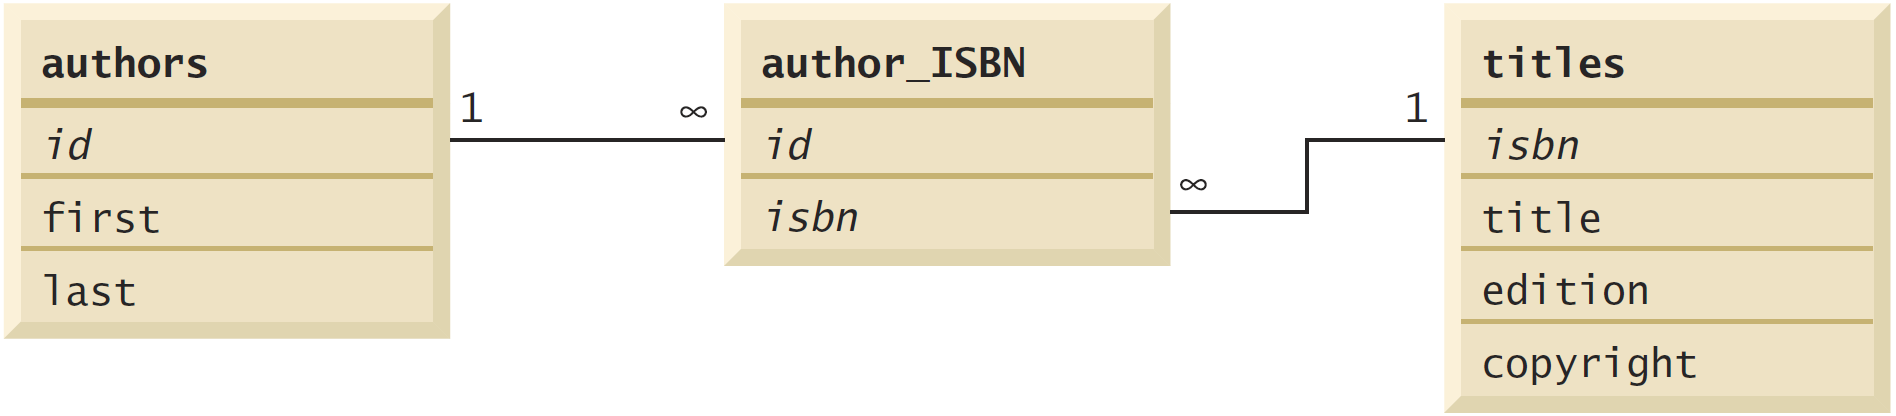

* every row must have a primary-key value
* that value must be unique in the table
* this is known as the **Rule of Entity Integrity**
* for the `author_ISBN` table, the primary key is the combination of both columns—this is a **composite primary key**

### SQL Keywords
| SQL keyword|Description
| :- | :- |
| `SELECT`	| Retrieves data from one or more tables.
| `FROM`	| Tables involved in the query. Required in every SELECT.
| `WHERE`	| Criteria for selection that determine the rows to be retrieved, deleted or updated. Optional in a SQL statement.
| `GROUP BY`	| Criteria for grouping rows. Optional in a SELECT query.
| `ORDER BY`	| Criteria for ordering rows. Optional in a SELECT query.
| `INNER JOIN`	| Merge rows from multiple tables.
| `INSERT`	| Insert rows into a specified table.
| `UPDATE`	| Update rows in a specified table.
| `DELETE`	| Delete rows from a specified table.

##  `SELECT` Queries

In [16]:
pd.read_sql('SELECT first, last FROM authors', connection)

,first,last
0,Paul,Deitel
1,Harvey,Deitel
2,Abbey,Deitel
3,Dan,Quirk
4,Alexander,Wald


##  `WHERE` Clause

In [ ]:
pd.read_sql("""SELECT title, edition, copyright 
                FROM titles 
                WHERE copyright > '2016'""", connection)

### Pattern Matching: Zero or More Characters 

In [ ]:
pd.read_sql("""SELECT id, first, last 
                FROM authors 
                WHERE last LIKE 'D%'""", 
             connection, index_col=['id'])

              

### Pattern Matching: Any Character

In [ ]:
pd.read_sql("""SELECT id, first, last 
                FROM authors 
                WHERE first LIKE '_b%'""", 
             connection, index_col=['id'])

              

##  `ORDER BY` Clause

In [ ]:
pd.read_sql('SELECT title FROM titles ORDER BY title ASC',
             connection)

### Sorting By Multiple Columns

In [ ]:
pd.read_sql("""SELECT id, first, last 
                FROM authors 
                ORDER BY last, first""", 
             connection, index_col=['id'])

In [ ]:
pd.read_sql("""SELECT id, first, last 
                FROM authors 
                ORDER BY last DESC, first ASC""", 
             connection, index_col=['id'])

              

### Combining the `WHERE` and `ORDER BY` Clauses

In [ ]:
pd.read_sql("""SELECT isbn, title, edition, copyright
                FROM titles
                WHERE title LIKE '%How to Program'
                ORDER BY title""", connection)

##  Merging Data from Multiple Tables: `INNER JOIN`

In [17]:
pd.read_sql("""SELECT first, last, isbn
                FROM authors
                INNER JOIN author_ISBN
                    ON authors.id = author_ISBN.id
                ORDER BY last, first""", connection).head()

,first,last,isbn
0,Abbey,Deitel,0132151006
1,Abbey,Deitel,0133406954
2,Harvey,Deitel,0134289366
3,Harvey,Deitel,0135404673
4,Harvey,Deitel,0132151006


##  `INSERT INTO` Statement

In [19]:
cursor = connection.cursor()

* a `Cursor` object is similar to an `iterable` dealing with results from db queries
* The pandas method `read_sql` actually uses a `Cursor behind the scenes to execute queries` and access the rows of the results

In [20]:
cursor = cursor.execute('SELECT * FROM authors')
for c in cursor:
    print(c)

(1, 'Paul', 'Deitel')
(2, 'Harvey', 'Deitel')
(3, 'Abbey', 'Deitel')
(4, 'Dan', 'Quirk')
(5, 'Alexander', 'Wald')


In [21]:
cursor = cursor.execute("""INSERT INTO authors (first, last)
                            VALUES ('Sue', 'Red')""")

In [22]:
pd.read_sql('SELECT id, first, last FROM authors', 
             connection, index_col=['id'])
             

,first,last
id,,
1,Paul,Deitel
2,Harvey,Deitel
3,Abbey,Deitel
4,Dan,Quirk
5,Alexander,Wald
6,Sue,Red


### Note Regarding Strings That Contain Single Quotes
* SQL delimits strings with single quotes (`'`). 
* A string containing a single quote, such as `O’Malley`, must have two single quotes in the position where the single quote appears (e.g., `'O''Malley'`). 
* The first acts as an escape character for the second. Not escaping singlequote characters in a string that’s part of a SQL statement is a SQL syntax error.

#  `UPDATE` Statement

In [ ]:
cursor = cursor.execute("""UPDATE authors SET last='Black'
                            WHERE last='Red' AND first='Sue'""") 

In [ ]:
cursor.rowcount

In [ ]:
pd.read_sql('SELECT id, first, last FROM authors', 
             connection, index_col=['id'])
             

#  `DELETE FROM` Statement

In [ ]:
cursor = cursor.execute('DELETE FROM authors WHERE id=6') 

In [ ]:
cursor.rowcount

In [ ]:
pd.read_sql('SELECT id, first, last FROM authors', 
             connection, index_col=['id'])

### Closing the Database

```
connection.close()
```

# Self Check
1. Select from the `titles` table all the titles and their edition numbers in descending order by edition number. Show only the first three results.

In [ ]:
pd.read_sql("""SELECT title, edition FROM titles
               ORDER BY edition DESC""", connection).head(3)

2. Select from the `authors` table all authors whose first names start with `'A'`.

In [ ]:
pd.read_sql("""SELECT * FROM authors
               WHERE first LIKE 'A%'""", connection)

3. SQL’s `NOT` keyword reverses the value of a `WHERE` clause’s condition. Select from the `titles` table all titles that do not end with `'How to Program'`.

In [ ]:
pd.read_sql("""SELECT isbn, title, edition, copyright
                FROM titles
                WHERE title NOT LIKE '%How to Program'
                ORDER BY title""", connection)

In [ ]:
connection.close()

In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################